#Q1: Multiclass Logistic Regression Implement Multiclass Logistic Regression (step-by-step) on Iris dataset using one vs. rest strategy?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
x=iris['data']
y=iris['target']
print(x.shape,y.shape)

(150, 4) (150,)


In [ ]:
import random
comb=np.hstack((x,y.reshape(-1,1)))
np.random.shuffle(comb)
x=comb[:,:-1]
y=comb[:,-1]
print(x.shape,y.shape)

(150, 4) (150,)


In [ ]:
import random
from sklearn import metrics

def sigmoid(z):
    return 1.0/(1+np.exp(-z))


def predict(x,beta):
    val= np.dot(x,beta)
    return sigmoid(val)

def error(x,y,beta):
    y_=predict(x,beta)

    return np.mean(y*np.log(y_)+(1-y)*np.log(1-y_))

    
def sigmoid_fit(x,y,learning_rate=0.01,max_iters=500):
    m,n=x.shape
    #print(m,n)
    beta=np.zeros(n)
    loss=[]
    for i in range(max_iters):
        y_=predict(x,beta)
        loss.append(np.sum((y_-y)**2)/m)
        grad=np.dot(x.T,(y_-y))
        grad=grad/m

        beta=beta-learning_rate*grad

    return beta,loss

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [ ]:
one=np.ones((x.shape[0],1))
x_=np.hstack((one,x_sc))
x_.shape

(150, 5)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_,y,test_size=0.15)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(127, 5) (23, 5) (127,) (23,)


0.0
[[15  0]
 [ 0  8]]
[[85  0]
 [ 0 42]]
1.0
[[12  1]
 [ 4  6]]
[[76 11]
 [23 17]]
2.0
[[18  0]
 [ 0  5]]
[[79  3]
 [ 1 44]]


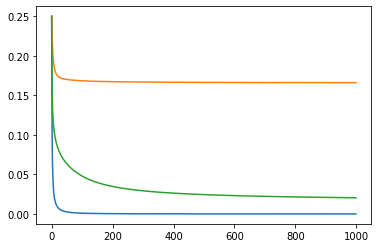

In [ ]:
from sklearn.metrics import confusion_matrix
labels=list(np.unique(y))
betas=[]
for i in labels:
    print(i)
    y_tr=np.zeros(y_train.shape)
    y_te=np.zeros(y_test.shape)
    y_tr[y_train==i]=1
    y_te[y_test==i]=1

    b,l=sigmoid_fit(x_train,y_tr,learning_rate=0.5,max_iters=1000)

    betas.append(b)
    # test
    y_pred=predict(x_test,b)
    #print(y_pred)
    y_pred[y_pred>0.5]=1
    y_pred[y_pred<0.5]=0
    print(confusion_matrix(y_te,y_pred))

    # train
    y_pred=predict(x_train,b)
    y_pred[y_pred>0.5]=1
    y_pred[y_pred<0.5]=0
    print(confusion_matrix(y_tr,y_pred))

    plt.plot(l)

In [ ]:
def prediction(x,beta):
    y_pred=[]
    for i in range(len(beta)):
        #print(i)
        b=beta[i]
        #print(type(b))
        #x_t=np.zeros(x.shape[0])
        #x_t[x_test==i]=1
        y_p=predict(x,b)
        #print(y_p)
        y_pred.append(y_p)
    return np.argmax(y_pred,axis=0)
#print(y_pred)
prediction(x_test,betas)

array([0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1,
       1])

In [ ]:
y_test

array([0., 2., 1., 0., 0., 0., 0., 2., 1., 2., 1., 1., 0., 1., 0., 0., 2.,
       1., 1., 2., 1., 1., 1.])

#Q2: The dataset labels that whether or not the student will get admission on the basis of the two exam scores. The plot of the data against exam1 and exam2

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/Assignment 6/exam.csv",header=None)
df

,0,1,2
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


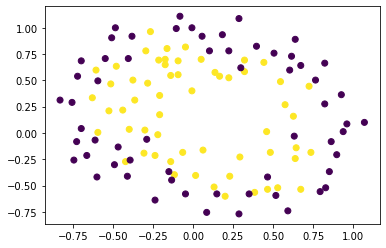

In [ ]:
plt.scatter(df.iloc[:,0].values,df.iloc[:,1].values,c=df.iloc[:,-1].values)

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x.shape,y.shape)

(118, 2) (118,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=6) # to specify the max degree we want to take of polynomial model
x_poly=poly.fit_transform(x)
x_poly.shape

(118, 28)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x_poly)
x_sc.shape

(118, 28)

In [ ]:
one=np.ones((x_sc.shape[0],1))
x_=np.hstack((x_sc,one))
x_.shape

(118, 29)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_,y,test_size=0.15)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(100, 29) (18, 29) (100,) (18,)


#Q2:(i) Step-by-Step Logistic Regression (with no regularization; alpha=10; number of iterations=1000)

0
[[7 3]
 [0 8]]
[[42  6]
 [ 8 44]]
1
[[8 0]
 [3 7]]
[[44  8]
 [ 6 42]]


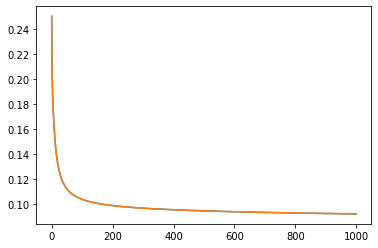

In [ ]:
from sklearn.metrics import confusion_matrix
labels=list(np.unique(y))
betas=[]
for i in labels:
    print(i)
    y_tr=np.zeros(y_train.shape)
    y_te=np.zeros(y_test.shape)
    y_tr[y_train==i]=1
    y_te[y_test==i]=1

    b,l=sigmoid_fit(x_train,y_tr,learning_rate=0.5,max_iters=1000)

    betas.append(b)
    # test
    y_pred=predict(x_test,b)
    #print(y_pred)
    y_pred[y_pred>0.5]=1
    y_pred[y_pred<0.5]=0
    print(confusion_matrix(y_te,y_pred))

    # train
    y_pred=predict(x_train,b)
    y_pred[y_pred>0.5]=1
    y_pred[y_pred<0.5]=0
    print(confusion_matrix(y_tr,y_pred))

    plt.plot(l)

In [ ]:
prediction(x_test,betas)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1])

#Q2: (ii) Step-by-Step Logistic Regression (with ridge regularization; alpha=10; number of iterations=1000; lambda=0.2)

In [ ]:
def ridge_sigmoid_fit(x,y,alpha=0.2,learning_rate=0.01,max_iters=500):
    m,n=x.shape
    #print(m,n)
    beta=np.zeros(n)
    loss=[]
    for i in range(max_iters):
        y_=predict(x,beta)
        loss.append(np.sum((y_-y)**2)/m)
        grad=np.dot(x.T,(y_-y))+alpha*beta
        grad=grad/m

        beta=beta-learning_rate*grad

    return beta,loss

0
[[7 3]
 [0 8]]
[[43  5]
 [ 9 43]]
1
[[8 0]
 [3 7]]
[[43  9]
 [ 5 43]]


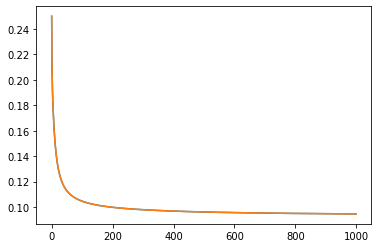

In [ ]:
from sklearn.metrics import confusion_matrix
labels=list(np.unique(y))
betas=[]
for i in labels:
    print(i)
    y_tr=np.zeros(y_train.shape)
    y_te=np.zeros(y_test.shape)
    y_tr[y_train==i]=1
    y_te[y_test==i]=1

    b,l=ridge_sigmoid_fit(x_train,y_tr,learning_rate=0.5,max_iters=1000)

    betas.append(b)
    # test
    y_pred=predict(x_test,b)
    #print(y_pred)
    y_pred[y_pred>0.5]=1
    y_pred[y_pred<0.5]=0
    print(confusion_matrix(y_te,y_pred))

    # train
    y_pred=predict(x_train,b)
    y_pred[y_pred>0.5]=1
    y_pred[y_pred<0.5]=0
    print(confusion_matrix(y_tr,y_pred))

    plt.plot(l)

In [ ]:
prediction(x_test,betas)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
betas

[array([ 0.        , -0.88219355, -1.97767861,  1.09795801,  1.42618805,
         1.28048176, -0.38045239, -0.8471518 , -0.64868269, -0.25574433,
         0.98789668,  0.09376669,  0.45850377,  0.50845101,  1.27664171,
         0.24749946,  0.55132866, -1.84759218,  0.40950196,  1.00511388,
         0.0048247 ,  1.0584627 ,  0.12525854,  0.56888511, -0.63522807,
         0.92055837,  0.86334574,  0.71508216,  1.03613161]),
 array([ 0.        ,  0.88219355,  1.97767861, -1.09795801, -1.42618805,
        -1.28048176,  0.38045239,  0.8471518 ,  0.64868269,  0.25574433,
        -0.98789668, -0.09376669, -0.45850377, -0.50845101, -1.27664171,
        -0.24749946, -0.55132866,  1.84759218, -0.40950196, -1.00511388,
        -0.0048247 , -1.0584627 , -0.12525854, -0.56888511,  0.63522807,
        -0.92055837, -0.86334574, -0.71508216, -1.03613161])]